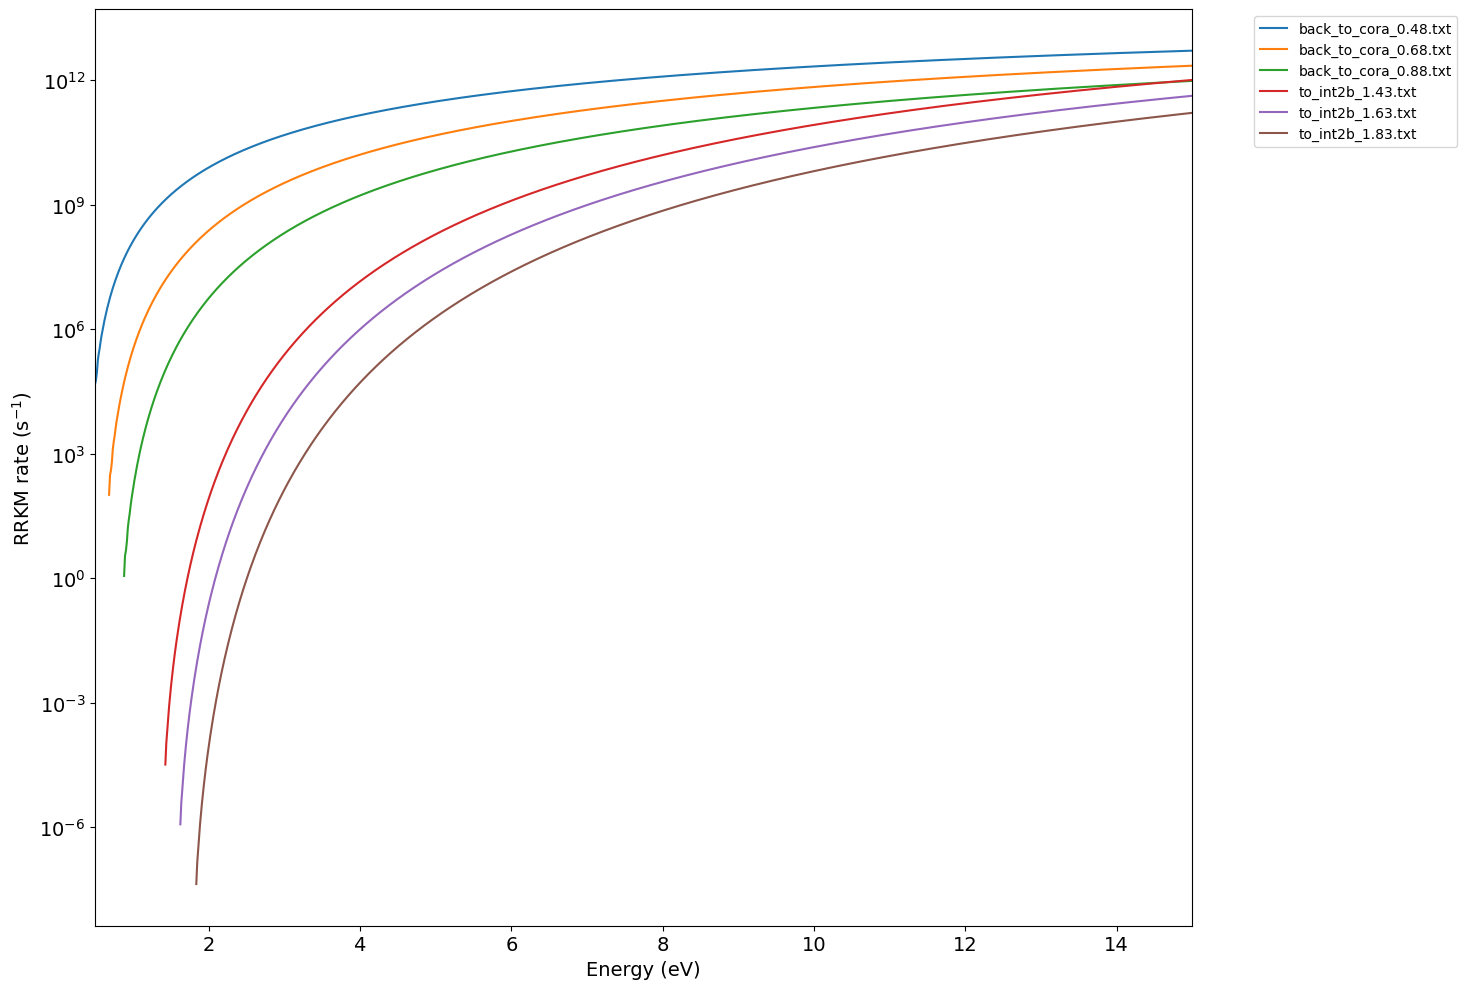

In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt


def read_RRKM_file(RRKM_FILE):
    

    
    # Read RRKM rates from the written file
    with open(RRKM_FILE, 'r') as file:
        lines = file.readlines()
    
    # Extract energy and RRKM rate values
    rates = []
    energies = []
    for line in lines[2:]:  # Skip the first two lines containing headers
        if line.strip():  # Ignore empty lines
            energy, rate = line.split()
            energies.append(float(energy))
            rates.append(float(rate))
    return energies, rates

###################################################################
# USER INPUT,  Directory containing the rate files
directory = '/Users/alessandracandian/PAH_mol_proc/data/rate_output'
###################################################################

plt.figure(figsize=(20,10))

# Get a list of all files in the directory
files = os.listdir(directory)
files.sort()

# Loop through each file
for file in files:
    if file.endswith('.txt'):  # Ensure only text files are processed
        RRKM_FILE = os.path.join(directory, file)
        energies, rates = read_RRKM_file(RRKM_FILE)
        plt.plot(energies, rates, label=file)

        
# Plot customization
plt.xlabel('Energy (eV)',fontsize='14')
plt.ylabel('RRKM rate (s$^{-1}$)',fontsize='14')
plt.tick_params(axis='both', labelsize='14')
# plt.title('RRKM Rate vs Energy')
#plt.grid(True)
plt.yscale('log')
plt.xlim(0.5, 15)


# Place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.75, 1])  # Adjust layout to make space for the legend

# Show the plot
plt.show()
